# <font color = blue>[Data Cleaning]</font>

## <font color = blue>Import Packages</font>

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import datetime

## <font color = blue>Import Data</font>

In [121]:
brands_df = pd.read_csv("./Raw Data/sample_brands - data.csv")
brands_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5839 entries, 0 to 5838
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   brand_id             5839 non-null   int64  
 1   created              5839 non-null   object 
 2   lastActive           5831 non-null   object 
 3   planLevel            5839 non-null   int64  
 4   num_sub_user         5839 non-null   int64  
 5   role                 5833 non-null   object 
 6   industry_categories  5816 non-null   object 
 7   bantScore            1295 non-null   float64
 8   companySize          2406 non-null   object 
 9   onboarding_stage     5600 non-null   float64
 10  country              4835 non-null   object 
dtypes: float64(2), int64(3), object(6)
memory usage: 501.9+ KB


In [122]:
brands_df.head()

,brand_id,created,lastActive,planLevel,num_sub_user,role,industry_categories,bantScore,companySize,onboarding_stage,country
0,1,2021/8/31 19:18,2021/8/31 19:20,0,1,brand,[],NaN,NaN,NaN,NaN
1,2,2020/8/28 4:38,2021/1/7 21:10,0,1,brand,[],NaN,NaN,4.0,United States
2,3,2020/8/21 13:55,2020/10/28 12:53,0,1,brand,[],NaN,NaN,4.0,NaN
3,4,2021/7/1 16:46,2021/7/1 16:46,0,1,founder,[],NaN,NaN,2.0,United States
4,5,2019/12/2 21:57,2019/12/20 17:35,0,1,brand,[],NaN,NaN,4.0,India


In [123]:
brands_df.shape

(5839, 11)

## <font color = blue>Data Cleaning </font>

- ###  <font color = blue>Change Data Types </font>

In [124]:
brands_df['created'] = pd.to_datetime(brands_df['created']) #Change time variable into datetime type
brands_df['lastActive'] = pd.to_datetime(brands_df['lastActive'])

In [125]:
brands_df.dtypes

brand_id                        int64
created                datetime64[ns]
lastActive             datetime64[ns]
planLevel                       int64
num_sub_user                    int64
role                           object
industry_categories            object
bantScore                     float64
companySize                    object
onboarding_stage              float64
country                        object
dtype: object

- ###  <font color = blue>Split Variables </font>

In [126]:
#Deal with industry categories

In [127]:
brands_df['industry_categories'] = brands_df['industry_categories'].str.replace('[','') #Remove Brackets
brands_df['industry_categories'] = brands_df['industry_categories'].str.replace(']','') 
brands_df['industry_categories'] = brands_df['industry_categories'].str.replace('\'','') #Remove Quotation marks
brands_df['industry_categories'] = brands_df['industry_categories'].str.replace(' ','') 

In [128]:
#d = {1: 'yes', 0: 'no'}
temp1 = brands_df.join(brands_df.pop('industry_categories').str.get_dummies(','))

In [129]:
# Create Dummy variables of industry categories
temp1['category_num'] = temp1.iloc[:,1:3164].sum(axis=1).astype(int)

In [130]:
pd.set_option('display.max_rows', None)
temp1.dtypes

brand_id                                            int64
created                                    datetime64[ns]
lastActive                                 datetime64[ns]
planLevel                                           int64
num_sub_user                                        int64
role                                               object
bantScore                                         float64
companySize                                        object
onboarding_stage                                  float64
country                                            object
Advertising                                         int64
Aerospace&Defense                                   int64
Agricultural&FarmMachinery                          int64
AgriculturalProducts                                int64
AirFreight&Logistics                                int64
Airlines                                            int64
AirportServices                                     int64
AlternativeCar

In [131]:
brands_clean = temp1.copy()

In [132]:
brands_clean.dtypes

brand_id                                            int64
created                                    datetime64[ns]
lastActive                                 datetime64[ns]
planLevel                                           int64
num_sub_user                                        int64
role                                               object
bantScore                                         float64
companySize                                        object
onboarding_stage                                  float64
country                                            object
Advertising                                         int64
Aerospace&Defense                                   int64
Agricultural&FarmMachinery                          int64
AgriculturalProducts                                int64
AirFreight&Logistics                                int64
Airlines                                            int64
AirportServices                                     int64
AlternativeCar

In [133]:
brands_clean.shape

(5839, 336)

In [134]:
brands_clean.head()

,brand_id,created,lastActive,planLevel,num_sub_user,role,bantScore,companySize,onboarding_stage,country,...,Watches,Water,WaterUtilities,Wedding&BridalPartyDresses,WeddingServices,Whiskey,Wine,WirelessTelecommunicationServices,Wristbands,category_num
0,1,2021-08-31 19:18:00,2021-08-31 19:20:00,0,1,brand,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
1,2,2020-08-28 04:38:00,2021-01-07 21:10:00,0,1,brand,NaN,NaN,4.0,United States,...,0,0,0,0,0,0,0,0,0,5
2,3,2020-08-21 13:55:00,2020-10-28 12:53:00,0,1,brand,NaN,NaN,4.0,NaN,...,0,0,0,0,0,0,0,0,0,5
3,4,2021-07-01 16:46:00,2021-07-01 16:46:00,0,1,founder,NaN,NaN,2.0,United States,...,0,0,0,0,0,0,0,0,0,3
4,5,2019-12-02 21:57:00,2019-12-20 17:35:00,0,1,brand,NaN,NaN,4.0,India,...,0,0,0,0,0,0,0,0,0,5


In [135]:
brands_clean['category_num'].value_counts()

5      2060
1       512
6       394
3       313
7       283
2       262
9       163
8       151
10      103
11       55
12       40
4        38
13       35
81       35
74       34
75       34
96       33
72       32
98       31
86       31
66       30
80       29
91       29
77       28
92       28
79       27
93       27
71       27
76       27
65       27
68       27
82       26
95       25
89       25
61       24
70       23
67       23
73       22
90       22
56       22
99       21
78       21
62       20
97       20
87       20
14       19
59       19
55       19
94       18
63       18
83       18
60       18
51       17
69       17
16       16
15       16
17       16
85       15
58       15
88       15
100      14
53       13
57       13
64       12
84       12
54       12
18       12
50       11
102      10
45       10
44       10
46       10
101       9
19        9
48        8
47        8
34        8
52        8
106       7
20        7
38        7
103       6
21        6
104 

In [136]:
#Find out which record covers '318' different industry categories
brands_clean.loc[brands_clean['category_num']==318]

,brand_id,created,lastActive,planLevel,num_sub_user,role,bantScore,companySize,onboarding_stage,country,...,Watches,Water,WaterUtilities,Wedding&BridalPartyDresses,WeddingServices,Whiskey,Wine,WirelessTelecommunicationServices,Wristbands,category_num


- ###  <font color = blue>Format Variables </font>

In [137]:
#Deal with 'Companysize'

In [138]:
brands_clean['companySize'].value_counts() #5 Level intotal

less than 10 employees    1765
10 - 49 employees          454
50 - 249 employees         111
1000 employees              45
250 - 999 employees         31
Name: companySize, dtype: int64

In [139]:
#Use number from 1-5 to replace the company size text, 1 represents 'less than 10 employees' and 5 represents '1000+ employees'
brands_clean['companySize'] = brands_clean['companySize'].str.replace('less than 10 employees','1')
brands_clean['companySize'] = brands_clean['companySize'].str.replace('10 - 49 employees','2')
brands_clean['companySize'] = brands_clean['companySize'].str.replace('50 - 249 employees','3')
brands_clean['companySize'] = brands_clean['companySize'].str.replace('250 - 999 employees','4')
brands_clean['companySize'] = brands_clean['companySize'].str.replace('1000 employees','5')
brands_clean['companySize'] = brands_clean['companySize'].fillna(0) #Define those records without information of the company size as 0


In [140]:
brands_clean['companySize'].value_counts()

0    3433
1    1765
2     454
3     111
5      45
4      31
Name: companySize, dtype: int64

- ###  <font color = blue>Deal with NA Data </font>

In [141]:
brands_clean.isnull().sum().sort_values(ascending=False).head(10) #Find out missing values

bantScore                                4544
country                                  1004
onboarding_stage                          239
lastActive                                  8
role                                        6
category_num                                0
Environmental&FacilitiesServices            0
ElectronicComputerComponents                0
ElectronicManufacturingServices             0
ElectronicTest&MeasurementInstruments       0
dtype: int64

In [142]:
brands_clean.head()

,brand_id,created,lastActive,planLevel,num_sub_user,role,bantScore,companySize,onboarding_stage,country,...,Watches,Water,WaterUtilities,Wedding&BridalPartyDresses,WeddingServices,Whiskey,Wine,WirelessTelecommunicationServices,Wristbands,category_num
0,1,2021-08-31 19:18:00,2021-08-31 19:20:00,0,1,brand,NaN,0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
1,2,2020-08-28 04:38:00,2021-01-07 21:10:00,0,1,brand,NaN,0,4.0,United States,...,0,0,0,0,0,0,0,0,0,5
2,3,2020-08-21 13:55:00,2020-10-28 12:53:00,0,1,brand,NaN,0,4.0,NaN,...,0,0,0,0,0,0,0,0,0,5
3,4,2021-07-01 16:46:00,2021-07-01 16:46:00,0,1,founder,NaN,0,2.0,United States,...,0,0,0,0,0,0,0,0,0,3
4,5,2019-12-02 21:57:00,2019-12-20 17:35:00,0,1,brand,NaN,0,4.0,India,...,0,0,0,0,0,0,0,0,0,5


In [143]:
#Deal with bantscore
#Use Mean to fulfill the missing values
brands_clean["bantScore"]=brands_clean["bantScore"].fillna(int(brands_clean["bantScore"].mean()))

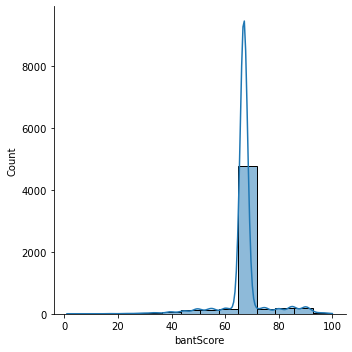

In [144]:
sns.displot(data=brands_clean["bantScore"], kde=True)
#From the bar plot, we can see that the scores are concentrated in 65 to 75

In [145]:
#Deal with country
#Use 'Other' to fulfill the missing values
brands_clean["country"]=brands_clean["country"].fillna('Other')

In [146]:
brands_clean.country.value_counts().sort_values(ascending=False)

United States                   4074
Other                           1004
United Kingdom                   208
India                            167
Canada                            79
South Africa                      16
Australia                         14
Nigeria                           11
Malaysia                          11
Pakistan                          10
Turkey                            10
Spain                             10
France                            10
Germany                           10
Philippines                        9
Indonesia                          9
Bangladesh                         9
Ireland                            8
Italy                              8
Mexico                             8
China                              7
Uganda                             7
Kenya                              6
Brazil                             6
Russian Federation                 5
Japan                              5
Egypt                              5
I

In [147]:
#Deal with last Active
#Use the time of created as last active to fullfill the missing values
brands_clean["lastActive"]=brands_clean["lastActive"].fillna(brands_clean["created"])

In [148]:
#Deal with role
#Use 'Other' to fulfill the missing values
brands_clean["role"]=brands_clean["role"].fillna('Other')

In [149]:
#Deal with onboarding_stage
#Delete the missing values
brands_clean = brands_clean.dropna()

In [150]:
brands_clean.isnull().sum().sort_values(ascending=False).head(10) #There is no missing values left

category_num                             0
EnergyDrinks                             0
ElectricalComponents&Equipment           0
ElectronicAccessories                    0
ElectronicComputerComponents             0
ElectronicManufacturingServices          0
ElectronicTest&MeasurementInstruments    0
Electronics                              0
Energy                                   0
EnergyBars                               0
dtype: int64

In [151]:
brands_clean.head()

,brand_id,created,lastActive,planLevel,num_sub_user,role,bantScore,companySize,onboarding_stage,country,...,Watches,Water,WaterUtilities,Wedding&BridalPartyDresses,WeddingServices,Whiskey,Wine,WirelessTelecommunicationServices,Wristbands,category_num
1,2,2020-08-28 04:38:00,2021-01-07 21:10:00,0,1,brand,67.0,0,4.0,United States,...,0,0,0,0,0,0,0,0,0,5
2,3,2020-08-21 13:55:00,2020-10-28 12:53:00,0,1,brand,67.0,0,4.0,Other,...,0,0,0,0,0,0,0,0,0,5
3,4,2021-07-01 16:46:00,2021-07-01 16:46:00,0,1,founder,67.0,0,2.0,United States,...,0,0,0,0,0,0,0,0,0,3
4,5,2019-12-02 21:57:00,2019-12-20 17:35:00,0,1,brand,67.0,0,4.0,India,...,0,0,0,0,0,0,0,0,0,5
5,6,2020-08-03 03:04:00,2020-08-03 03:18:00,0,1,brand,67.0,0,4.0,United States,...,0,0,0,0,0,0,0,0,0,5


# <font color = blue>[Feature Engineering]</font>

## <font color = blue>Add New Columns</font>

- ###  <font color = blue>Add Time Related Values</font>

In [152]:
# Split datetime columns into specific month, day and year columns.
columns = ['created','lastActive']
y_list = [list(brands_clean[c].dt.year) for c in columns]
m_list = [list(brands_clean[c].dt.month) for c in columns]
d_list = [list(brands_clean[c].dt.day) for c in columns]

date_list=[y_list,m_list,d_list]
date_suffix = ['year','month','day']

for c in columns:
    j=columns.index(c)
    for i in range(len(date_list)):
        name = str(c)+str("_")+str(date_suffix[i])
        brands_clean[name] = pd.Categorical(date_list[i][j]) 
brands_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5600 entries, 1 to 5838
Columns: 342 entries, brand_id to lastActive_day
dtypes: category(6), datetime64[ns](2), float64(2), int64(329), object(3)
memory usage: 14.4+ MB


In [153]:
#Split datetime columns into businessday, monthend and quarterly features
weekday_list = [list(brands_clean[c].dt.weekday) for c in columns]
weekofyear_list = [list(brands_clean[c].dt.weekofyear) for c in columns]
quarter_list = [list(brands_clean[c].dt.quarter) for c in columns]

date_list=[weekday_list,weekofyear_list,quarter_list]
date_suffix = ['weekday','weekofyear','quarter']

for c in columns:
    j=columns.index(c)
    for i in range(len(date_list)):
        name = str(c)+str("_")+str(date_suffix[i])
        brands_clean[name] = pd.Categorical(date_list[i][j]) 
brands_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5600 entries, 1 to 5838
Columns: 348 entries, brand_id to lastActive_quarter
dtypes: category(12), datetime64[ns](2), float64(2), int64(329), object(3)
memory usage: 14.5+ MB


In [154]:
# Add Active time variable
brands_clean['active_time']=brands_clean.lastActive.copy()-brands_clean.created.copy()
brands_clean['active_time']= brands_clean['active_time'].dt.days
brands_clean['active_time'].describe()

count    5600.000000
mean       35.062857
std        99.613210
min         0.000000
25%         0.000000
50%         0.000000
75%         7.000000
max       992.000000
Name: active_time, dtype: float64

In [155]:
brands_clean.head()

,brand_id,created,lastActive,planLevel,num_sub_user,role,bantScore,companySize,onboarding_stage,country,...,lastActive_year,lastActive_month,lastActive_day,created_weekday,created_weekofyear,created_quarter,lastActive_weekday,lastActive_weekofyear,lastActive_quarter,active_time
1,2,2020-08-28 04:38:00,2021-01-07 21:10:00,0,1,brand,67.0,0,4.0,United States,...,2021,1,7,4,35,3,3,1,1,132
2,3,2020-08-21 13:55:00,2020-10-28 12:53:00,0,1,brand,67.0,0,4.0,Other,...,2020,10,28,4,34,3,2,44,4,67
3,4,2021-07-01 16:46:00,2021-07-01 16:46:00,0,1,founder,67.0,0,2.0,United States,...,2021,7,1,3,26,3,3,26,3,0
4,5,2019-12-02 21:57:00,2019-12-20 17:35:00,0,1,brand,67.0,0,4.0,India,...,2019,12,20,0,49,4,4,51,4,17
5,6,2020-08-03 03:04:00,2020-08-03 03:18:00,0,1,brand,67.0,0,4.0,United States,...,2020,8,3,0,32,3,0,32,3,0


- ###  <font color = blue>Add Label: Promoted or Not</font>

In [156]:
def promote(row):  
    if row['planLevel'] == 0:
        return '0'
    return '1'

In [157]:
brands_clean['Promoted'] = brands_clean.apply(lambda row: promote(row), axis=1)


In [158]:
brands_clean.Promoted.value_counts()

0    5535
1      65
Name: Promoted, dtype: int64

- ###  <font color = blue>Delete Useless Data</font>

In [159]:
brands_clean.dtypes

brand_id                                            int64
created                                    datetime64[ns]
lastActive                                 datetime64[ns]
planLevel                                           int64
num_sub_user                                        int64
role                                               object
bantScore                                         float64
companySize                                        object
onboarding_stage                                  float64
country                                            object
Advertising                                         int64
Aerospace&Defense                                   int64
Agricultural&FarmMachinery                          int64
AgriculturalProducts                                int64
AirFreight&Logistics                                int64
Airlines                                            int64
AirportServices                                     int64
AlternativeCar

In [160]:
brands_clean.drop(['created', 'lastActive'], axis=1, inplace=True)

## <font color = blue>Export Cleaned Data</font>

In [161]:
brands_clean.to_csv("./Cleaned Data/cleaned_brands_df.csv", index=False)